## COGS 108 - Final Project

## Mass shootings in America




## Names and group member IDs

Duy Ngo - A14695298
 <br>Hanyang(Patrick) Liu 
 <br>Behnam Shamloufard 
 <br>Josephine Reyes
 <br>Caleb Lopez
 <br>Fatin Pasha




## 1. Project Setup







**1.1 Import Libraries**

In [80]:
# !pip install geopandas


In [81]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Erase warnings
import warnings
warnings.filterwarnings("ignore")
#For geo infomation processing
# import geopandas as gpd


**1.2 Configure Libraries**

In [82]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

**1.3 Read data from csv file**

In [83]:
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')

In [103]:
data_2018

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
...,...,...,...,...,...,...,...
334,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
335,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN
336,"January 1, 2018",Alabama,Huntsville,2025 Sparkman Dr NW,1,3,NaN


In [104]:
data_2017

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),3404 E County Line Rd,2,6,NaN
1,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,NaN
2,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,NaN
...,...,...,...,...,...,...,...
343,"January 1, 2017",Mississippi,Winstonville,114 North Greyer Street,0,5,NaN
344,"January 1, 2017",Texas,Dallas,9220 Skillman Street,1,3,NaN
345,"January 1, 2017",Florida,Miami,8000 block of NW 14th Ave,0,7,NaN


In [105]:
data_2016

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2016",Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,"December 31, 2016",Texas,Houston,3704 Fannin Street,1,3,NaN
2,"December 30, 2016",Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
...,...,...,...,...,...,...,...
379,"January 8, 2016",Illinois,Chicago,1500 block of South Kedzie,1,4,NaN
380,"January 7, 2016",Tennessee,Memphis,3800 block of Kerwood Avenue,1,3,NaN
381,"January 6, 2016",Florida,Lakeland,2312 East Magnolia Street,3,1,NaN


In [106]:
data_2015

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,476321,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,473882,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,472268,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
...,...,...,...,...,...,...,...,...
332,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1,NaN
333,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4,NaN
334,272016,"January 1, 2015",Tennessee,Memphis,Interstate 240 and Poplar Avenue,0,5,NaN


## 2. Data Wrangling/Cleaning & Pre-processing







**2.1 transform everything into dataframe**

In [88]:
# transform everything into dataframe
df2015 = pd.DataFrame(data_2015)
df2016 = pd.DataFrame(data_2016)
df2017 = pd.DataFrame(data_2017)
df2018 = pd.DataFrame(data_2018)

**2.2 Remove and/or rename unnecessary columns**

In [89]:
#Drop the incident ID column from year 2015
df2015 = df2015.drop(columns=['Incident ID'])
#Drop the Operations and Address columnn in all the datasets
dfs = [df2015, df2016, df2017, df2018]
for df in dfs:
    df.drop(['Operations', 'Address'], inplace=True, axis=1, errors='ignore')


In [102]:
df2015

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2015",Tennessee,Memphis,0,5
1,"January 2, 2015",Georgia,Savannah,1,4
2,"January 4, 2015",Texas,Dallas,3,1
...,...,...,...,...,...
332,"December 26, 2015",Pennsylvania,Philadelphia,0,4
333,"December 27, 2015",Tennessee,Jackson,0,4
334,"December 31, 2015",Louisiana,New Orleans,0,6


**2.3 Sort the datasets by ascending date**

In [91]:
for df in dfs:
    idx=df.index.values
    df.iloc[:] = df.iloc[::-1].values
    df.index = idx
# df2016.head()
# df2017.head()
df2018

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2018",Alabama,Huntsville,1,3
1,"January 4, 2018",Arkansas,Brinkley,1,3
2,"January 5, 2018",Mississippi,Hattiesburg,0,6
...,...,...,...,...,...
334,"December 28, 2018",Missouri,Saint Charles,4,1
335,"December 29, 2018",Ohio,Lima,1,3
336,"December 31, 2018",Ohio,Cleveland,3,2


**2.4 Combine the data from the four years together**


In [92]:
df = pd.concat([df2015, df2016, df2017, df2018], join="inner", ignore_index = True)

In [93]:
df

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2015",Tennessee,Memphis,0,5
1,"January 2, 2015",Georgia,Savannah,1,4
2,"January 4, 2015",Texas,Dallas,3,1
...,...,...,...,...,...
1397,"December 28, 2018",Missouri,Saint Charles,4,1
1398,"December 29, 2018",Ohio,Lima,1,3
1399,"December 31, 2018",Ohio,Cleveland,3,2


In [94]:
df['# Injured'].max()

441

In [95]:
df['# Killed'].max()

59

In [96]:
df['State'].value_counts()

California       145
Illinois         138
Florida          109
                ... 
Vermont            1
West Virginia      1
South Dakota       1
Name: State, Length: 45, dtype: int64

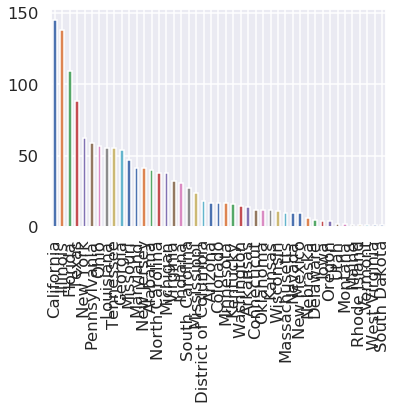

In [97]:
df['State'].value_counts().plot(kind='bar')

In [98]:
df['# Injured'].value_counts()

4      555
3      263
5      192
      ... 
20       1
25       1
441      1
Name: # Injured, Length: 23, dtype: int64

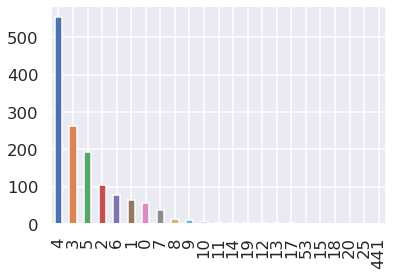

In [99]:
df['# Injured'].value_counts().plot(kind='bar')

In [100]:
df.loc[newdf['# Injured'] == 0 ]

,Incident Date,State,City Or County,# Killed,# Injured
7,"January 9, 2015",California,San Francisco,4,0
21,"January 31, 2015",Georgia,Lagrange,4,0
58,"March 24, 2015",Indiana,Indianapolis,4,0
...,...,...,...,...,...
1316,"September 12, 2018",California,Bakersfield,6,0
1350,"October 15, 2018",Tennessee,Columbia,5,0
1376,"November 19, 2018",Pennsylvania,Philadelphia,4,0


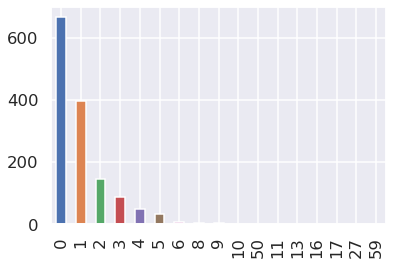

In [101]:
df['# Killed'].value_counts().plot(kind='bar')